## Домашнее задание 3 (10 баллов)

In [157]:
# графики в некоторых заданиях (особенно в 8-м, 9-м и 12-м) по всем параметрам 
# соответствуют образцам, но почему-то строятся корректно только при втором запуске ячейки 
# (при первом запуске они либо слишком маленькие, 
# либо у них сбрасываются настройки общего стиля)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [158]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [159]:
data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv")
data.shape # 1000 строк и 21 столбец

(1000, 21)

In [160]:
data.head() # первые 5 строк

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [161]:
data.tail() # последние 5 строк

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [162]:
data.isnull().values.any() # пропусков нет

False

In [163]:
data.describe(include="all")

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000,1000.000000,1000,1000,1000.00000,1000,1000,1000,1000,1000,...,1000,1000.00000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,NaN,5,10,NaN,5,5,4,4,3,...,4,NaN,3,3,4,4,2,2,2,2
top,... >= 200 DM / salary for at least 1 year,NaN,no credits taken/all credits paid back duly,furniture/equipment,NaN,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,building soc. savings agr./life insurance,NaN,none,rent,1,skilled employee/official,0 to 2,no,no,good
freq,394,NaN,530,280,NaN,603,339,476,548,907,...,332,NaN,814,714,633,630,845,596,963,700
mean,NaN,20.903000,NaN,NaN,3271.24800,NaN,NaN,NaN,NaN,NaN,...,NaN,35.54200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,12.058814,NaN,NaN,2822.75176,NaN,NaN,NaN,NaN,NaN,...,NaN,11.35267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,4.000000,NaN,NaN,250.00000,NaN,NaN,NaN,NaN,NaN,...,NaN,19.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,12.000000,NaN,NaN,1365.50000,NaN,NaN,NaN,NaN,NaN,...,NaN,27.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,18.000000,NaN,NaN,2319.50000,NaN,NaN,NaN,NaN,NaN,...,NaN,33.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,24.000000,NaN,NaN,3972.25000,NaN,NaN,NaN,NaN,NaN,...,NaN,42.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
# исходя из показателя unique, в наборе данных 4 бинарных переменных: 
# people_liable, telephone,	foreign_worker и credit_risk
# (у этих переменных всего два хначения, которые можно закодировать как "0" и "1")

# переменную people_liable, впрочем, можно по смыслу отнести к категориальным
# однако мы будем рассматривать её как бинарную

In [165]:
import numpy as np
data.describe(include=[np.number]) 
# в наборе данных три количественные переменные: duration, amount и age

,duration,amount,age
count,1000.000000,1000.00000,1000.00000
mean,20.903000,3271.24800,35.54200
std,12.058814,2822.75176,11.35267
min,4.000000,250.00000,19.00000
25%,12.000000,1365.50000,27.00000
50%,18.000000,2319.50000,33.00000
75%,24.000000,3972.25000,42.00000
max,72.000000,18424.00000,75.00000


In [166]:
# найдём уникальные значения для определения порядковых и категорильных переменных
data_without_numeric = data.drop(columns=['duration','amount','age'])
for i in data_without_numeric.columns:
  print(data_without_numeric[i].name, ":")
  print(*data_without_numeric[i].unique(), "\n", sep = ',  ')

status :
no checking account,  ... < 0 DM,  ... >= 200 DM / salary for at least 1 year,  0<= ... < 200 DM,  

credit_history :
all credits at this bank paid back duly,  no credits taken/all credits paid back duly,  existing credits paid back duly till now,  delay in paying off in the past,  critical account/other credits elsewhere,  

purpose :
car (used),  others,  retraining,  furniture/equipment,  car (new),  business,  domestic appliances,  radio/television,  repairs,  vacation,  

savings :
unknown/no savings account,  ... <  100 DM,  100 <= ... <  500 DM,  ... >= 1000 DM,  500 <= ... < 1000 DM,  

employment_duration :
< 1 yr,  1 <= ... < 4 yrs,  4 <= ... < 7 yrs,  unemployed,  >= 7 yrs,  

installment_rate :
< 20,  25 <= ... < 35,  20 <= ... < 25,  >= 35,  

personal_status_sex :
female : non-single or male : single,  male : married/widowed,  female : single,  male : divorced/separated,  

other_debtors :
none,  guarantor,  co-applicant,  

present_residence :
>= 7 yrs,  1 <= ..

In [167]:
# категориальные переменные: credit_history, purpose, personal_status_sex, 
# other_debtors, property, other_installment_plans, housing, job

# порядковые переменные: status, savings, employment_duration, installment_rate, 
# present_residence, number_credits

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [168]:
data.groupby("purpose")["amount"].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [169]:
data41 = data[(data["age"] < 30) & (data["housing"] == "rent")]
print("Среди клиентов моложе 30 лет ", 
      (len(data41) / len(data)) * 100, "% снимает жилье.", sep = '')

data42 = data[(data["age"] > 40) & (data["housing"] == "rent")]
print("Среди клиентов старше 40 лет ", 
      (len(data42) / len(data)) * 100, "% снимает жилье.", sep = '')

Среди клиентов моложе 30 лет 24.6% снимает жилье.
Среди клиентов старше 40 лет 18.5% снимает жилье.


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [170]:
data50 = data[(data["foreign_worker"] == "yes") & 
              (data["number_credits"] != "1") & 
              (data["number_credits"] != "2-3")]
print("Количество иностранцев, у которых число кредитов больше 3:", len(data50))

Количество иностранцев, у которых число кредитов больше 3: 1


### Задание 6 (1 балл)

In [171]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

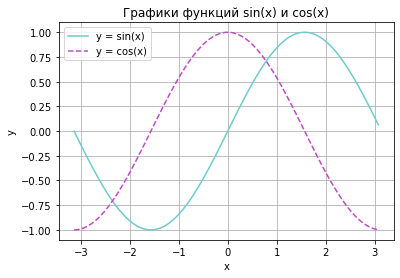

In [172]:
x = np.arange(-np.pi, np.pi, 2 * np.pi / 100, dtype = float)
y1 = np.sin(x)
y2 = np.cos(x)

# сформируем новый набор данных, в котором x — это 100 значений в диапазоне [-pi, pi], 
# y1 — это значения функции y = sin(x), 
# y2 — это значения функции y = cos(x)
df60 = pd.DataFrame()
df60['x'] = pd.DataFrame(x)
df60['y1'] = np.sin(x)
df60['y2'] = np.cos(x)

# построим график с помощью нового набора данных:
plt.plot(df60['x'], df60['y1'], color = '#6DCBCD')
plt.plot(df60['x'], df60['y2'], color = '#BF4AC8', linestyle = "--")
plt.legend(labels = ['y = sin(x)', 'y = cos(x)']) # добавим легенду
plt.xlabel("x") # добавим название оси x
plt.ylabel("y") # добавим название оси y
plt.grid() # добавим сетку на график
plt.title("Графики функций sin(x) и cos(x)"); # добавим название графика

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

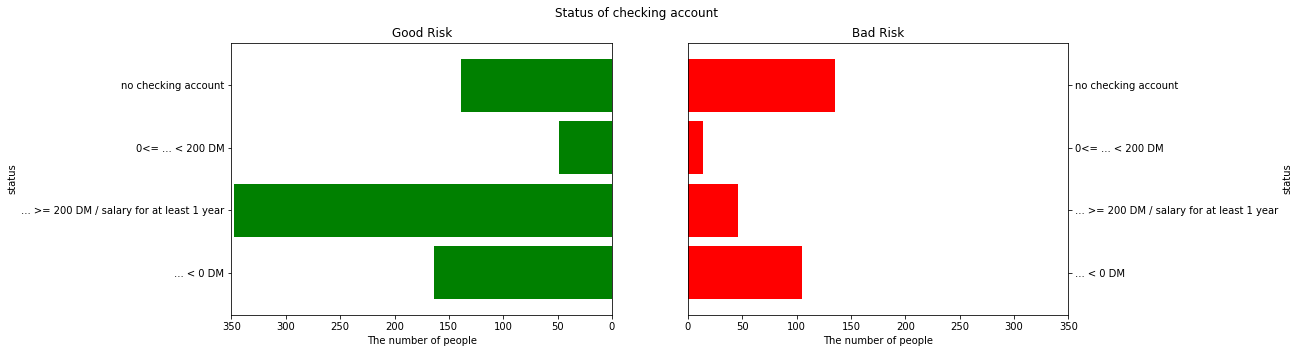

In [173]:
from operator import invert
data71 = data[data['credit_risk'] == 'good']
data72 = data[data['credit_risk'] == 'bad']

plt.figure()
plt.suptitle('Status of checking account')
plt.subplot(1, 2, 1)
ax71 = data71.groupby('status')['credit_risk'].count().plot(
    kind='barh', width = 0.85, left=0, ylabel='Status', 
    title='Good Risk', color = "green", figsize=(15, 5))
ax71.set(xlabel='The number of people')
plt.xlim(350, 0)
plt.subplot(1, 2, 2)
ax72 = data72.groupby('status')['credit_risk'].count().plot(
    kind='barh', width = 0.85, left=0, ylabel='Status', 
    title='Bad Risk', color = "red", figsize=(15, 5))
ax72.set(xlabel='The number of people')
plt.ylabel
plt.xlim(0, 350)
ax72.yaxis.set_label_position("right")
ax72.yaxis.set_ticks_position("right")

# среди надёжных клиентов преобладают те, 
# чей статус соответствует параметру "... >= 200 DM / salary for at least 1 year"

# среди ненадёжных клиентов преобладают те, 
# у кого нет счёта для проверки ("no checking account")

### Задание 8  (0.5 балла)

In [174]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

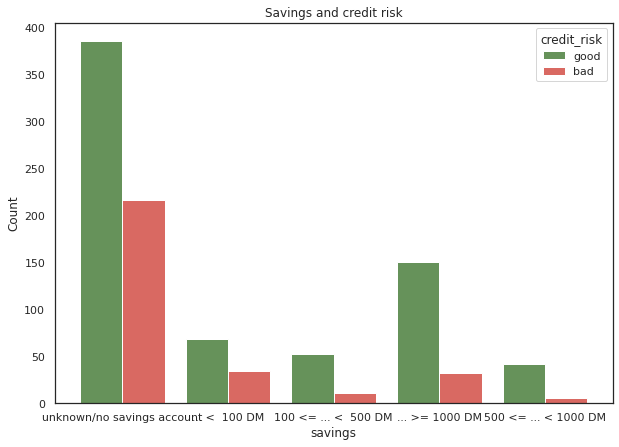

In [176]:
ax80 = sns.histplot(data=data['savings'], x=data['savings'], 
                    hue=data['credit_risk'], palette = ['#336E23', '#CD372E'], 
                    multiple="dodge", shrink=.8)
ax80.grid(False)
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white', 
            'figure.figsize':( 10, 7 )})
sns.set_style('white')
ax80.set_title('Savings and credit risk');

# если у случайного клента банка есть сберегательный счёт, 
# он, вероятнее всего, является надёжным клиентом

# впрочем, этот вывод справедлив и для других клиентов, 
# в том числе тех, у кого нет сберегательного счёта

# seaborn строит красивые графики, мне однозначно понравилось!
# восприятие результата хорошее, длина кода вполне адекватная, 
# а для уменьшения сложности написания кода всего лишь требуются опыт и сноровка

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

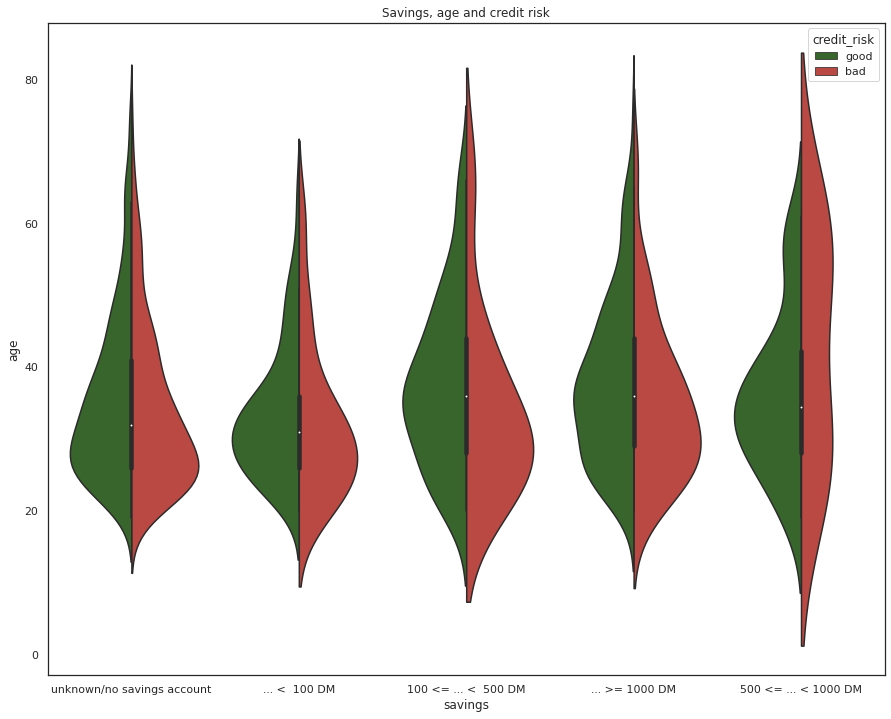

In [178]:
ax90 = sns.violinplot(data=data, x='savings', y='age', hue='credit_risk', 
                      split=True, palette = ['#336E23', '#CD372E'])
sns.set(rc={'axes.facecolor':'white', 
            'figure.facecolor':'white', 
            'figure.figsize':( 15, 12 )})
sns.set_style('white')
ax90.set_title('Savings, age and credit risk');

# для всех категорий сберегательного счёта характерно то, что больше всего 
# надёжных и ненадёжных клиентов относятся к людям среднего возраста

# среди счетов в диапазоне 500 <= ... < 1000 (DM) распределение ненадёжных клиентов 
# по возрастам более равномерное, чем в других категориях счетов

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

<ipython-input-179-78c7b4d5b6f4>:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([ax101, ax102, ax103], labels = ['Good credits age distribution',


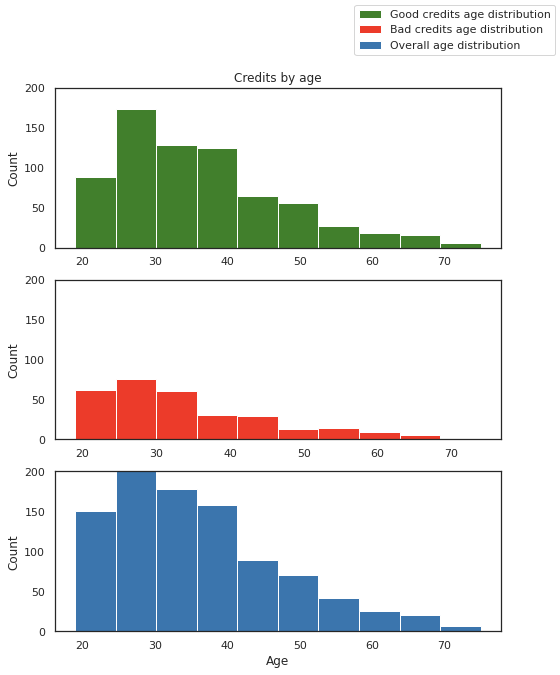

In [179]:
fig, (ax101, ax102, ax103) = plt.subplots(1, 3, figsize = (8, 10), sharex=True)

ax101 = plt.subplot(311)
plt.hist(data71['age'], color = '#417F2C')
plt.ylim(0, 200)
plt.ylabel('Count')
ax101.set_title('Credits by age')

ax102 = plt.subplot(312)
plt.hist(data72['age'], color='#EC3B2A')
plt.ylim(0, 200)
plt.ylabel('Count')

ax103 = plt.subplot(313)
plt.hist(data['age'], color='#3B75AD')
plt.ylim(0, 200)
plt.ylabel('Count')
plt.xlabel('Age')

fig.legend([ax101, ax102, ax103], labels = ['Good credits age distribution', 
                                            'Bad credits age distribution', 
                                            'Overall age distribution'])

plt.show()

# для всех случаев большинству клиентов 25-35 лет

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


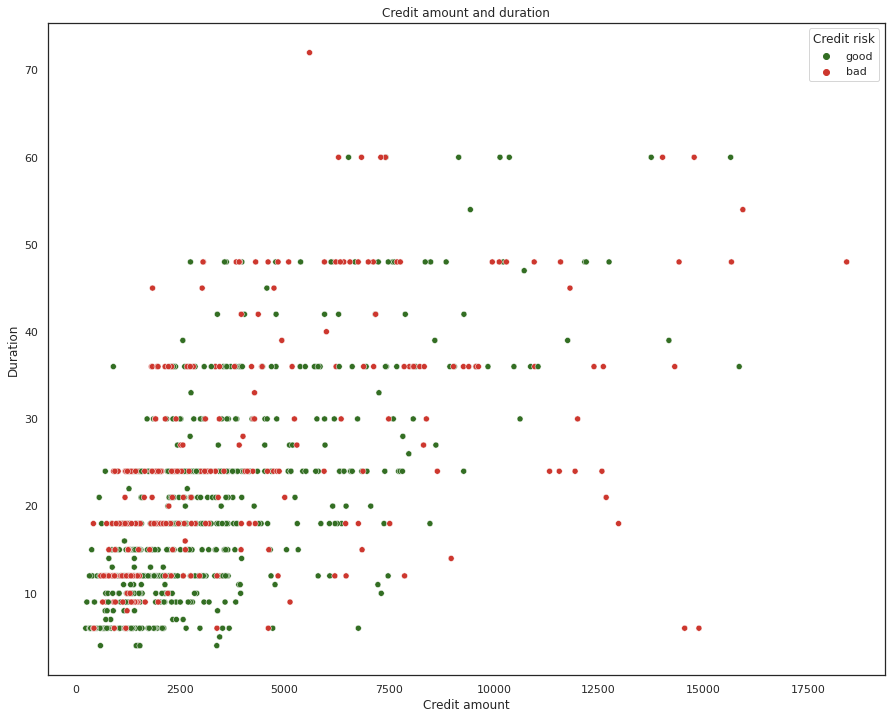

In [180]:
ax110 = sns.scatterplot('amount', 'duration', data=data, 
    hue='credit_risk', palette = ['#336E23', '#CD372E'])
sns.set(rc={'axes.facecolor':'white', 
            'figure.facecolor':'white', 
            'figure.figsize':( 12, 10 )})
ax110.legend(title = 'Credit risk')
ax110.set(xlabel='Credit amount')
ax110.set(ylabel='Duration')
ax110.set_title('Credit amount and duration');
# клиент, у которго кредит на небольшую сумму и сроком на полгода, 
# вероятнее всего, надёжен
# клиент, у которго сумма кредита со сроком менее двух лет превышает 10000, 
# вероятнее всего, ненадёжен

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

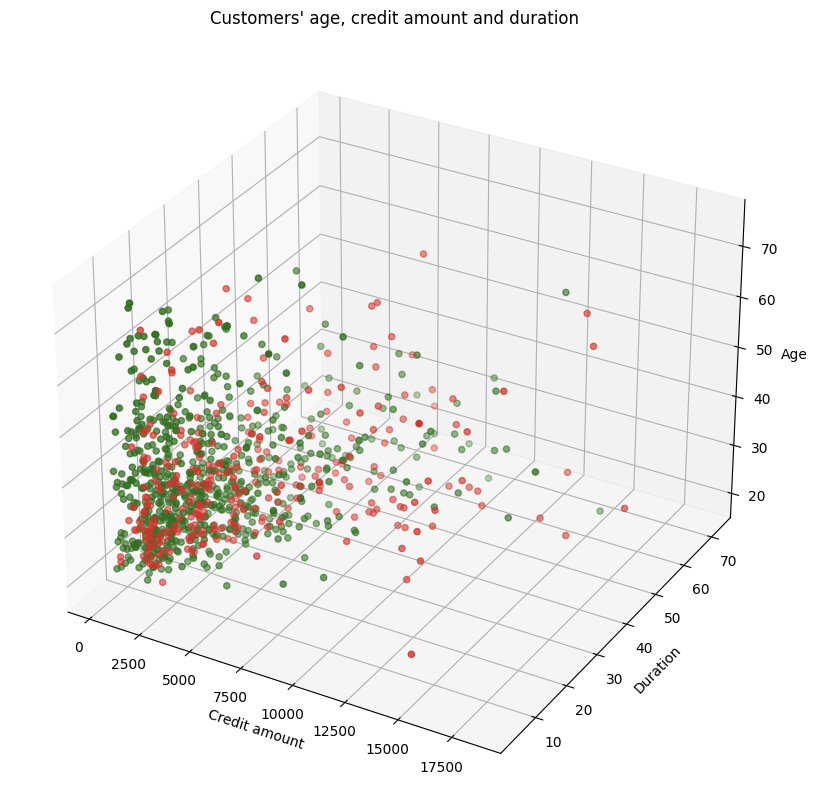

In [182]:
fig, ax = plt.subplots(figsize = (10, 10), subplot_kw={"projection": "3d"})
plt.style.use('default')
ax.scatter(data71['amount'], data71['duration'], data71['age'], c='#336E23')
ax.scatter(data72['amount'], data72['duration'], data72['age'], c='#CD372E') 
plt.title("Customers' age, credit amount and duration") # добавим название графика
ax.set_xlabel('Credit amount') # добавим название оси x
ax.set_ylabel('Duration') # добавим название оси y
ax.set_zlabel('Age'); # добавим название оси z

# среди клиентов, у которых размер кредита не превышает 2500, 
# преобладают люди молодого возраста

# среди клиентов, у которых срок кредита не превышает 30 месяцев, 
# также преобладают люди молодого возраста

# обе категории, надёжные клиенты и ненадёжные, 
# встречаются как среди молодёжи, так и среди пожилых людей

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [183]:
# удалим все категориальные признаки из набора данных, 
# потому что в контексте скоринга они все, вероятно, имеют справочное значение

data130 = data.drop(columns = ['credit_history', 'purpose', 
                               'personal_status_sex', 'other_debtors', 
                               'property', 'other_installment_plans', 
                               'housing', 'job'])
data130.head()

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,1049,unknown/no savings account,< 1 yr,< 20,>= 7 yrs,21,1,0 to 2,no,no,good
1,no checking account,9,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,1 <= ... < 4 yrs,36,2-3,3 or more,no,no,good
2,... < 0 DM,12,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,>= 7 yrs,23,1,0 to 2,no,no,good
3,no checking account,12,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,1 <= ... < 4 yrs,39,2-3,3 or more,no,yes,good
4,no checking account,12,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,>= 7 yrs,38,2-3,0 to 2,no,yes,good


In [184]:
# преобрзуем все бинарные переменные (кроме credit_risk): people_liable, 
# telephone, foreign_worker и credit_risk
data130['people_liable'] = data130['people_liable'].replace(
    ['0 to 2', '3 or more'], [0, 1])
data130['telephone'] = data130['telephone'].replace(
    ['no', 'yes (under customer name)'],[0, 1])
data130['foreign_worker'] = data130['foreign_worker'].replace(
    ['no', 'yes'],[0, 1])
data130['credit_risk'] = data130['credit_risk'].replace(
    ['bad', 'good'], [0, 1])

data130.head()

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,1049,unknown/no savings account,< 1 yr,< 20,>= 7 yrs,21,1,0,0,0,1
1,no checking account,9,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,1 <= ... < 4 yrs,36,2-3,1,0,0,1
2,... < 0 DM,12,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,>= 7 yrs,23,1,0,0,0,1
3,no checking account,12,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,1 <= ... < 4 yrs,39,2-3,1,0,1,1
4,no checking account,12,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,>= 7 yrs,38,2-3,0,0,1,1


In [185]:
# найдём уникальные значения всех порядковых переменных
data131 = data130.drop(columns=['duration','amount','age', 'people_liable', 
                                'telephone', 'foreign_worker', 'credit_risk'])
for i in data131.columns:
  print(data131[i].name, ":")
  print(*data131[i].unique(), "\n", sep = ',  ')

status :
no checking account,  ... < 0 DM,  ... >= 200 DM / salary for at least 1 year,  0<= ... < 200 DM,  

savings :
unknown/no savings account,  ... <  100 DM,  100 <= ... <  500 DM,  ... >= 1000 DM,  500 <= ... < 1000 DM,  

employment_duration :
< 1 yr,  1 <= ... < 4 yrs,  4 <= ... < 7 yrs,  unemployed,  >= 7 yrs,  

installment_rate :
< 20,  25 <= ... < 35,  20 <= ... < 25,  >= 35,  

present_residence :
>= 7 yrs,  1 <= ... < 4 yrs,  4 <= ... < 7 yrs,  < 1 yr,  

number_credits :
1,  2-3,  4-5,  >= 6,  



In [187]:
# с помощью найденных значений составим словарь и закодируем значения в логичном порядке
# "логичность" заключеатся в том, что значения признаков 
# будут идти от 0 к n-1 в порядке возрастания

dict130 = {
    'status': {'no checking account': 0, 
               '... < 0 DM': 1, 
               '0<= ... < 200 DM': 2, 
               '... >= 200 DM / salary for at least 1 year': 3},
    'savings': {'unknown/no savings account': 0,
                '... <  100 DM': 1,
                '100 <= ... <  500 DM': 2,
                '500 <= ... < 1000 DM': 3,
                '... >= 1000 DM': 4},
    'employment_duration': {'unemployed': 0,
                            '< 1 yr': 1,
                            '1 <= ... < 4 yrs': 2,
                            '4 <= ... < 7 yrs': 3,
                            '>= 7 yrs': 4},
    'installment_rate': {'< 20': 0,
                         '20 <= ... < 25': 1,
                         '25 <= ... < 35': 2,
                         '>= 35': 3},
    'present_residence': {'< 1 yr': 0,
                          '1 <= ... < 4 yrs': 1,
                          '4 <= ... < 7 yrs': 2,
                          '>= 7 yrs': 3},
    'number_credits': {'1': 0,
                       '2-3': 1,
                       '4-5': 2,
                       '>= 6': 3}
           }

In [190]:
data130 = data130.replace(dict130)

data130.head()

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,0,18,1049,0,1,0,3,21,0,0,0,0,1
1,0,9,2799,0,2,2,1,36,1,1,0,0,1
2,1,12,841,1,3,2,3,23,0,0,0,0,1
3,0,12,2122,0,2,1,1,39,1,1,0,1,1
4,0,12,2171,0,2,0,3,38,1,0,0,1,1


In [191]:
data130.describe(include="all")

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.577000,20.903000,3271.24800,1.105000,2.384000,1.027000,1.845000,35.54200,0.407000,0.155000,0.404000,0.037000,0.700000
std,1.257638,12.058814,2822.75176,1.580023,1.208306,1.118715,1.103718,11.35267,0.577654,0.362086,0.490943,0.188856,0.458487
min,0.000000,4.000000,250.00000,0.000000,0.000000,0.000000,0.000000,19.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,1365.50000,0.000000,2.000000,0.000000,1.000000,27.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,18.000000,2319.50000,0.000000,2.000000,1.000000,2.000000,33.00000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,24.000000,3972.25000,2.000000,4.000000,2.000000,3.000000,42.00000,1.000000,0.000000,1.000000,0.000000,1.000000
max,3.000000,72.000000,18424.00000,4.000000,4.000000,3.000000,3.000000,75.00000,3.000000,1.000000,1.000000,1.000000,1.000000


In [192]:
data130.dtypes # все признаки теперь имеют тип int

status                 int64
duration               int64
amount                 int64
savings                int64
employment_duration    int64
installment_rate       int64
present_residence      int64
age                    int64
number_credits         int64
people_liable          int64
telephone              int64
foreign_worker         int64
credit_risk            int64
dtype: object

In [193]:
# отмасштабируем некоторые признаки

import numpy as np
# значение размера кредита не будет превышать 20:
data130['amount'] = (np.around(data130['amount'] / 1000)).astype(int) 

# округлим возраст до десятков лет:
data130['age'] = (np.around(data130['age'] / 10)).astype(int) 

# переведём месяцы в годы:
data130['duration'] = (np.around(data130['duration'] / 12)).astype(int) 

data130.head()

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,0,2,1,0,1,0,3,2,0,0,0,0,1
1,0,1,3,0,2,2,1,4,1,1,0,0,1
2,1,1,1,1,3,2,3,2,0,0,0,0,1
3,0,1,2,0,2,1,1,4,1,1,0,1,1
4,0,1,2,0,2,0,3,4,1,0,0,1,1


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [194]:
def predict(Xtest: np.array) -> np.array:
    return (5*Xtest[:, 0] - 10*(Xtest[:, 1] - 1) - (Xtest[:, 2] - 5) + (Xtest[:, 3]) + (Xtest[:, 7] - 3) - Xtest[:, 8] - Xtest[:, 11]) > 0
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data130.drop('credit_risk', 1).values
y = data130['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
X_test, y_test = X[800:, :], y[800:]
accuracy_score(y_test, predict(X_test))

<ipython-input-194-8cff01f86ae0>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data130.drop('credit_risk', 1).values


0.66

Получилась модель, точность которой соответстует требуемой: 0.66 > 0.6. Для формулы использовались закономерности, полученные после построения графика в предыдущих заданиях:


1.   Статус счёта клиента (status), количество сбережений (savings) и количество кредитов (number_credits) оказывали значимое влияние, что видно из графиков в заданиях 7, 8, 9, а также из эмпирического наблюдения о том, что чрезмерно большое количество кредитов негативно для репутации клиента. Выводы задания 5 также обусловили необходимость в каком-либо виде учитывать гражданство клиента (foreign_worker).
2.   Срок кредита (duration): большие значения негативны для репутации клиента, что видно из графиков в заданиях 11 и 12. Впрочем, кредиты сроком до 1 года (без учёта суммы кредита), вероятно, не будут оказывать значительного влияния на репутацию.
3.   Сумма кредита (amount): большие значения негативны для репутации клиента, что видно из графиков в заданиях 11 и 12. Впрочем, негативная оценка наиболее заметна в тех случаях, когда сумма превышает 5000.
4.   Возраст клиента (age): клиенты до 35 лет менее платёжеспособны, что отчасти подтверждается графиками в заданиях 9, 10 и 12. Это оказывает негативное воздействие на их рейтинг.



